In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid', {'legend.frameon':True})
sns.set(font_scale = 1.5)

import matplotlib.pyplot as plt
import re
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [52]:
skaters = pd.read_csv('skaters.csv')
skaters = skaters[skaters.situation == 'all']
skaters.set_index('name', inplace = True)

In [53]:
df_cols = skaters.columns.tolist()
cols = [x.lower().replace('i_f_', "") for x in df_cols]
skaters.columns = cols

In [54]:
teams = skaters.team.unique()

In [55]:
central = skaters[(skaters.team == 'CHI') | (skaters.team == 'STL') | (skaters.team == 'COL') | (skaters.team == 'DAL') | (skaters.team == 'WPG') | (skaters.team == 'MIN') | (skaters.team == 'NSH')]

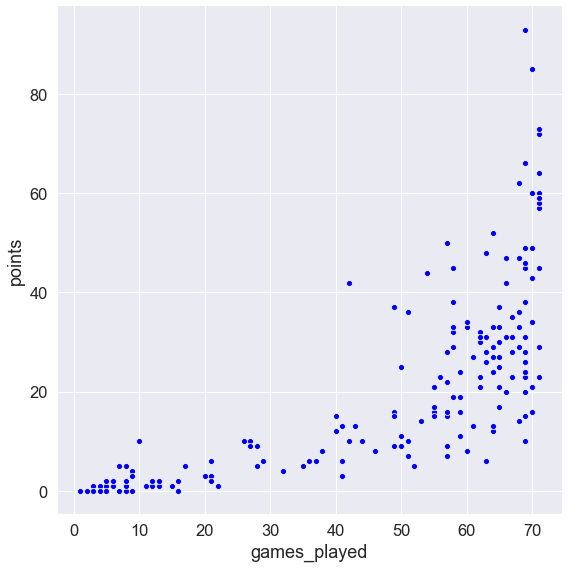

In [56]:
g = sns.relplot(data = central, x = 'games_played', y = 'points', color = 'blue')
g.fig.set_size_inches(8,8)
plt.tight_layout()

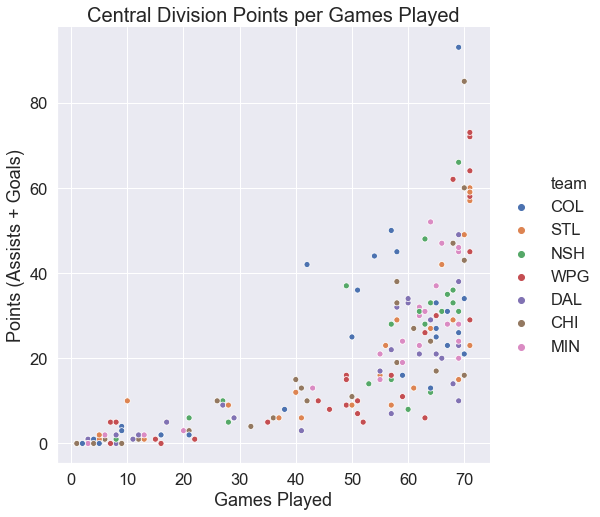

In [69]:
g = sns.relplot(data = central, x = 'games_played', y = 'points', hue = 'team')
g.fig.set_size_inches(7,7)
leg = g._legend
leg.set_bbox_to_anchor([1.2, 0.5])
g.fig.suptitle('Central Division Points per Games Played', y = 1.02, x = 0.55, size = 20)
g.set(xlabel = 'Games Played', ylabel = 'Points (Assists + Goals)')
plt.tight_layout()

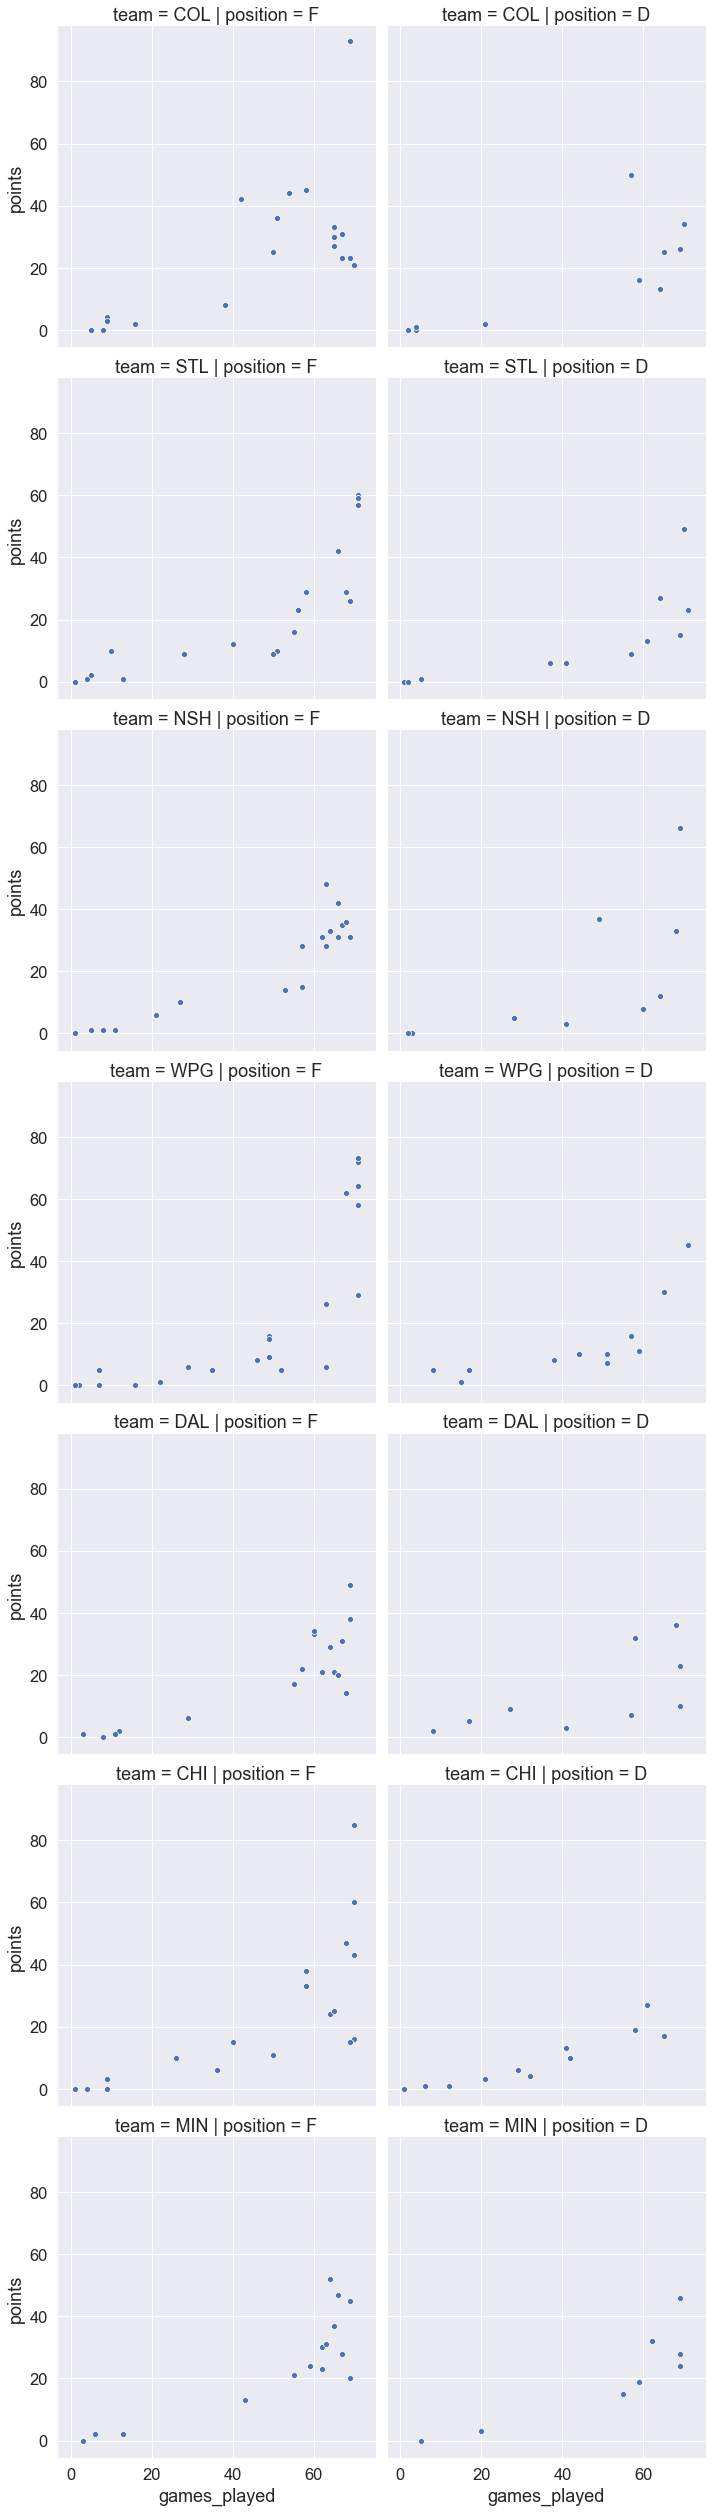

In [307]:
central2 = central.copy()
central2.position = central2.position.replace(['C', 'L', 'R'], 'F')
h = sns.relplot(data = central2, x = 'games_played', y = 'points', col = 'position', row = 'team')

# Boxplot -- sns.catplot()

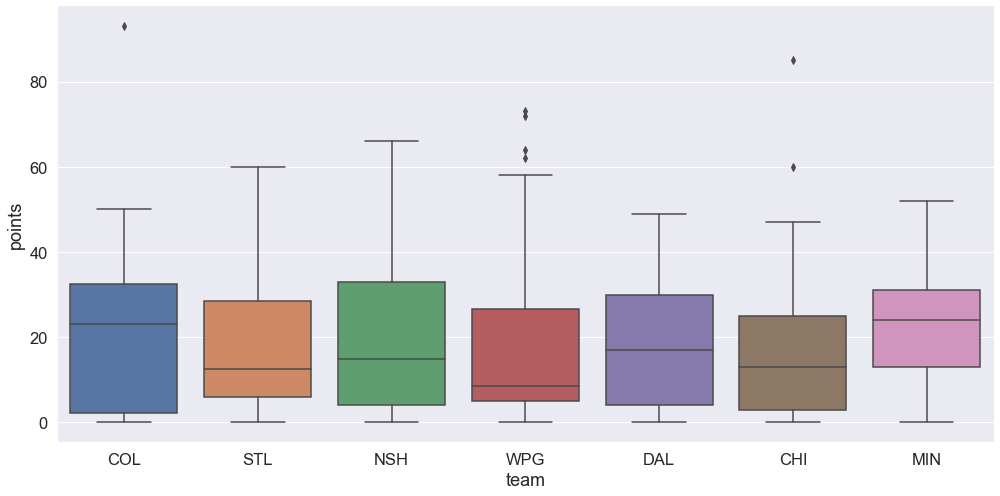

In [306]:
f = sns.catplot(data = central2, x = 'team', y = 'points', kind = 'box', height = 7, aspect = 2)

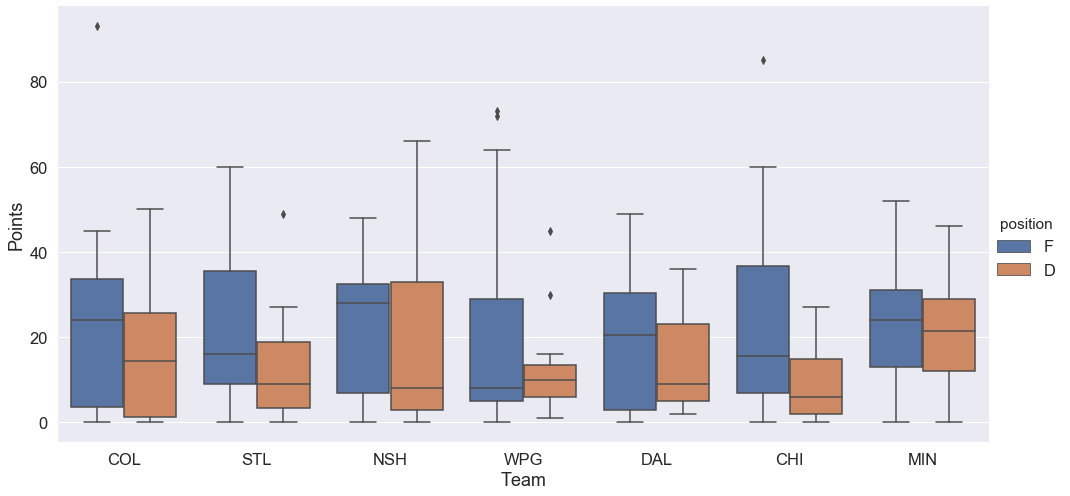

In [300]:
f2 = sns.catplot(data = central2, x = 'team', y = 'points', hue = 'position', kind = 'box', height = 7, aspect = 2)
f2.set(xlabel = 'Team', ylabel = 'Points')

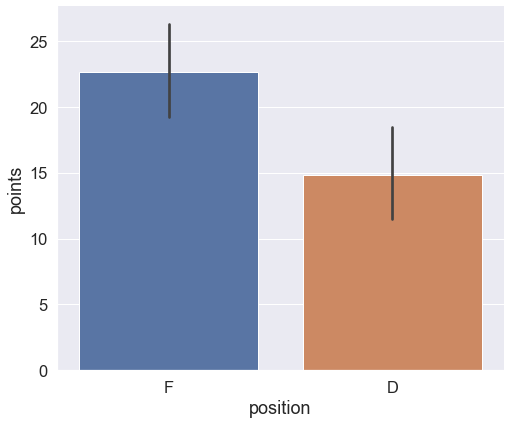

In [291]:
b = sns.catplot(data = central2, x = 'position', y = 'points', kind = 'bar', height = 6, aspect = 1.2)

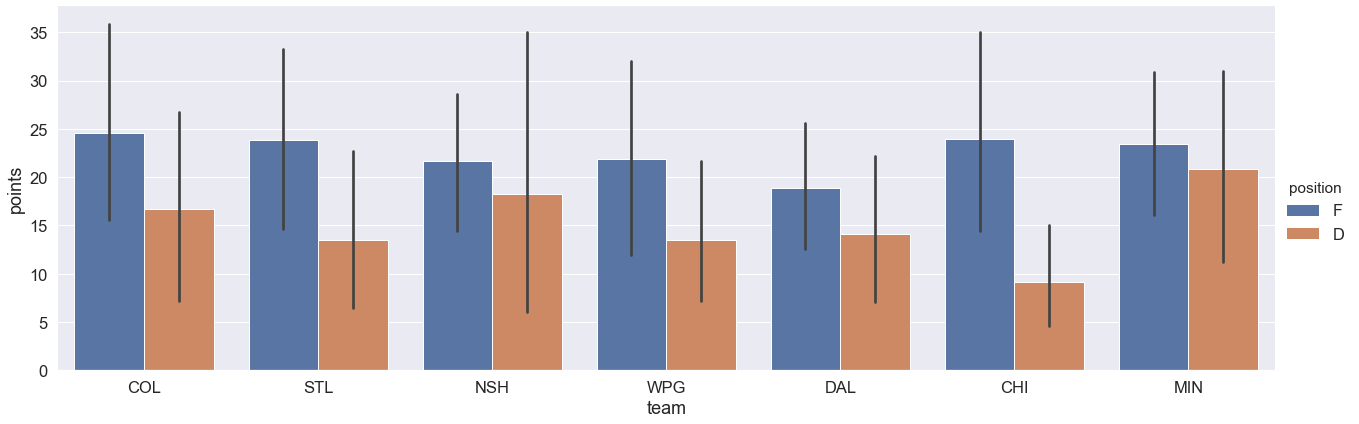

In [293]:
b2 = sns.catplot(data = central2, x = 'team', y = 'points', hue = 'position', height = 6, kind = 'bar', aspect = 3)

# Violin Plot

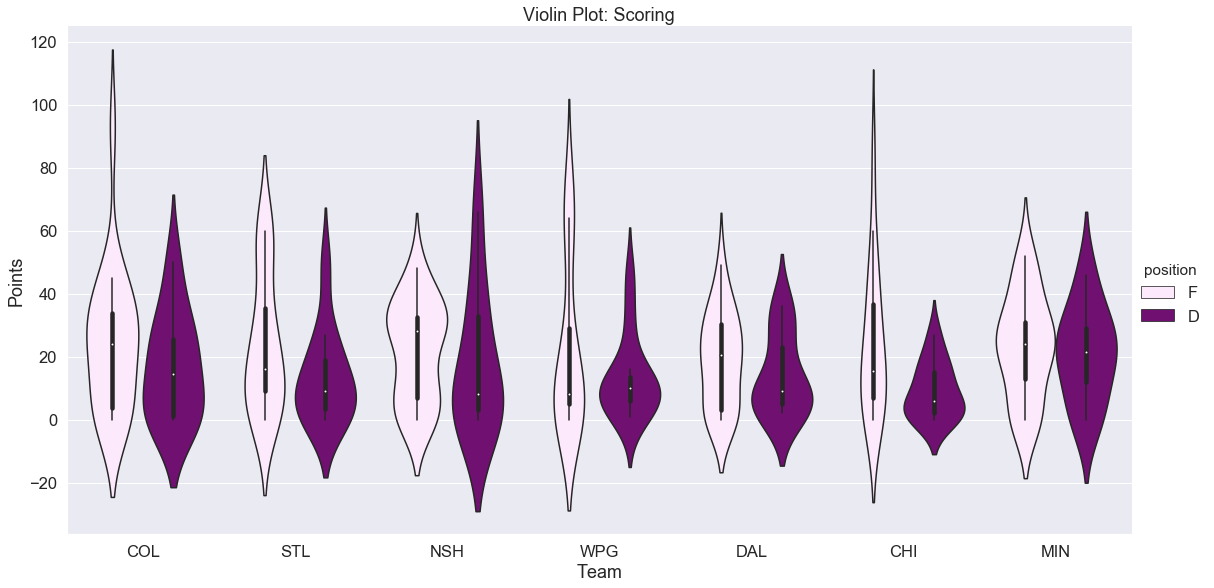

In [218]:
b = sns.catplot(x = 'team', y = 'points', kind = 'violin', data = central2, hue = 'position', height = 8, aspect = 2, color = 'purple')
b.set(xlabel = 'Team', ylabel = 'Points', title = 'Violin Plot: Scoring')

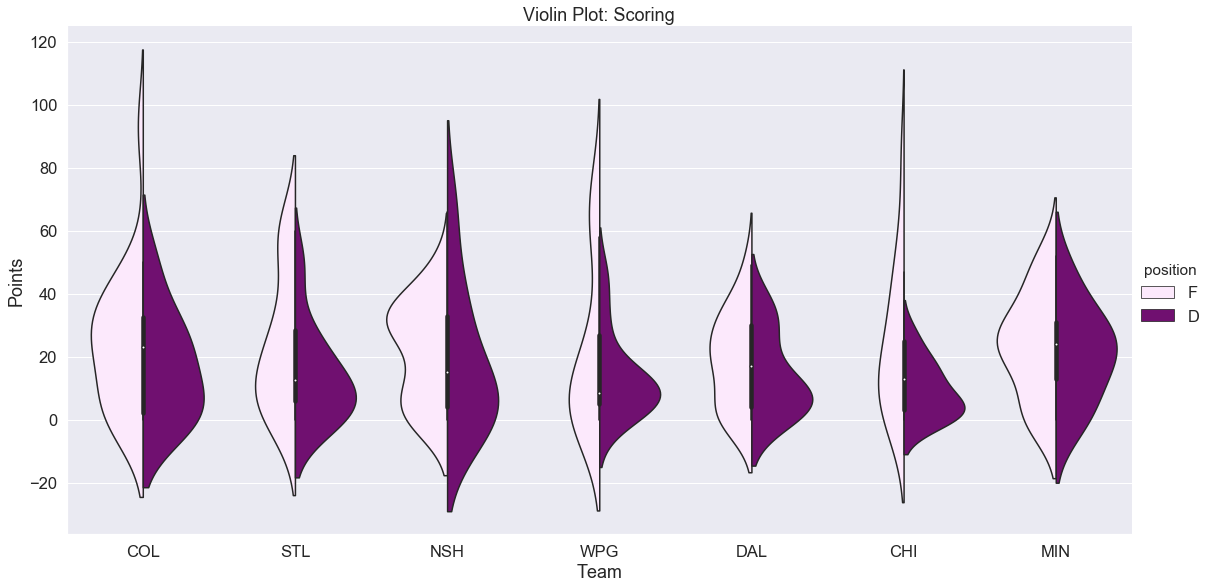

In [219]:
b = sns.catplot(x = 'team', y = 'points', kind = 'violin', data = central2, hue = 'position', height = 8, aspect = 2, color = 'purple', split = True)
b.set(xlabel = 'Team', ylabel = 'Points', title = 'Violin Plot: Scoring')

# Pointplot 

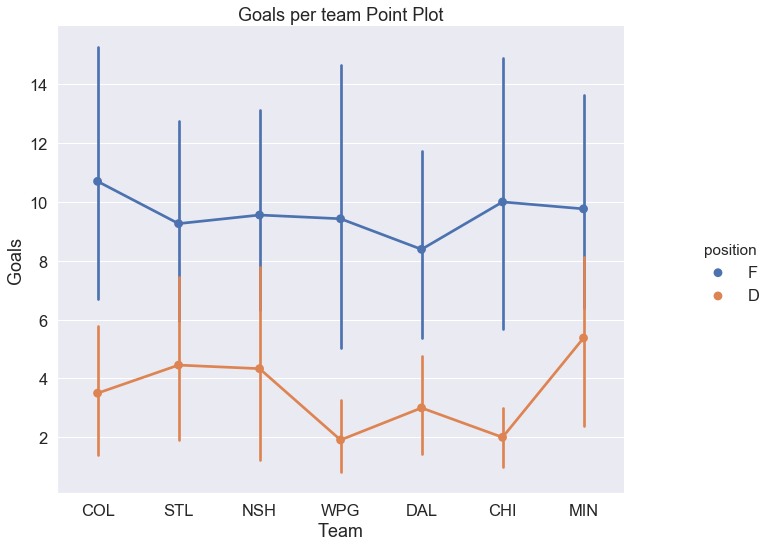

In [310]:
p = sns.catplot(x = 'team', y = 'goals', hue = 'position', kind = 'point', data = central2)
p.set(xlabel = 'Team', ylabel = 'Goals', title = 'Goals per team Point Plot')
p.fig.set_size_inches([12,8])

# Swarm Plot 

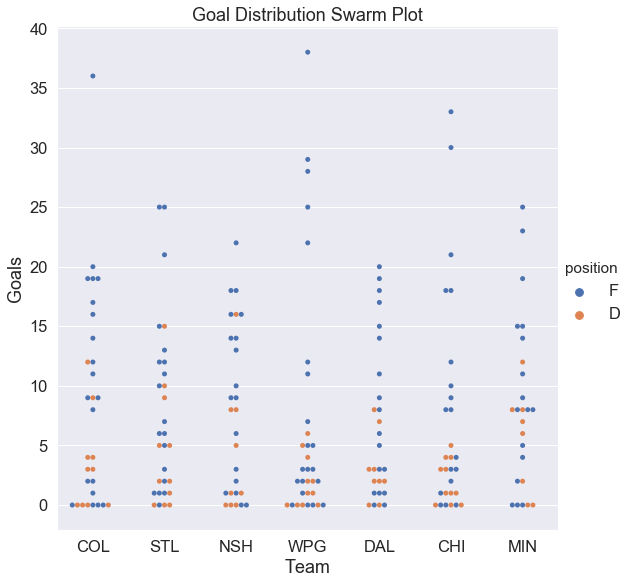

In [248]:
c = sns.catplot(x = 'team', y = 'goals', hue = 'position', kind = 'swarm', data = central2, height = 8, aspect = 1)
c.set(xlabel = 'Team', ylabel = 'Goals', title = 'Goal Distribution Swarm Plot');

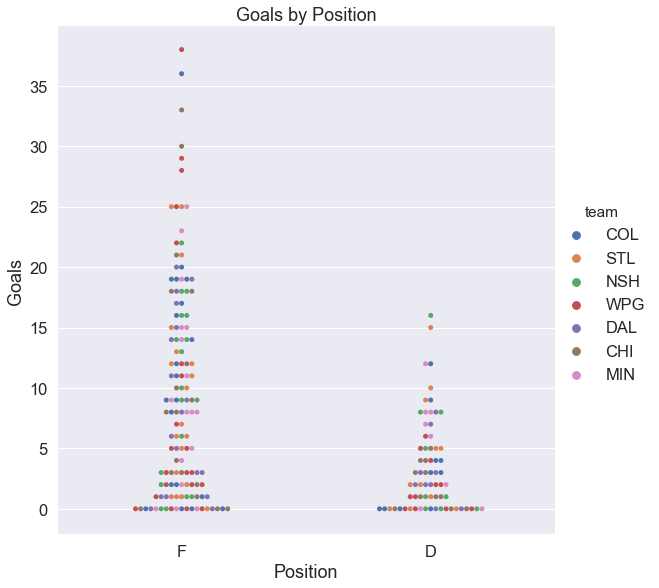

In [255]:
d = sns.catplot(x = 'position', y = 'goals', hue = 'team', kind = 'swarm', data = central2, height = 8, aspect = 1)
d.set(xlabel = 'Position', ylabel = 'Goals', title = 'Goals by Position');

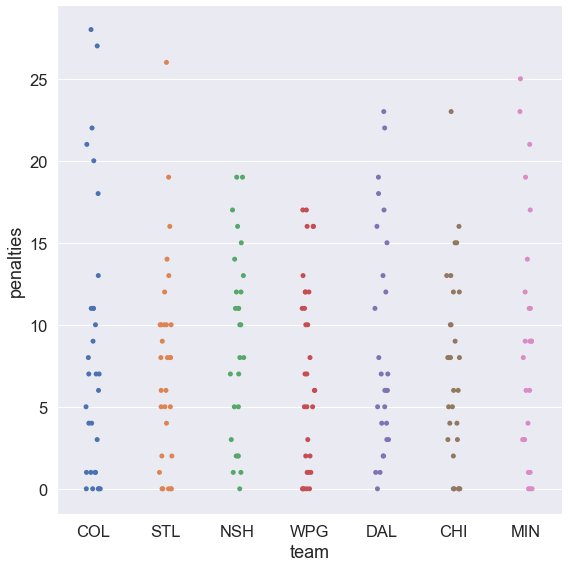

In [261]:
t = sns.catplot(data = central, y = 'penalties', x = 'team', height = 8, aspect = 1)

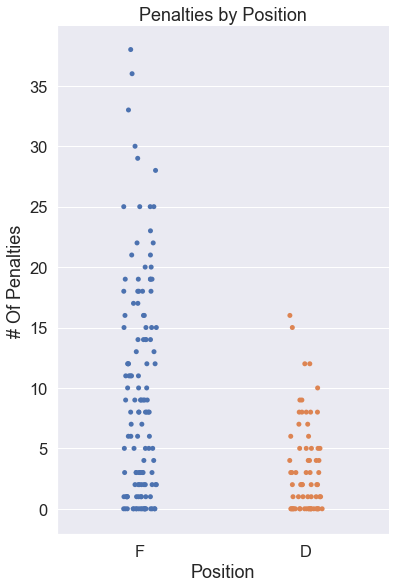

In [278]:
t = sns.catplot(data = central2, y = 'goals', x = 'position', height = 8, aspect = 0.7, jitter = True)
t.set(xlabel = 'Position', ylabel = '# Of Penalties', title = 'Penalties by Position');

# Univariate Distributions

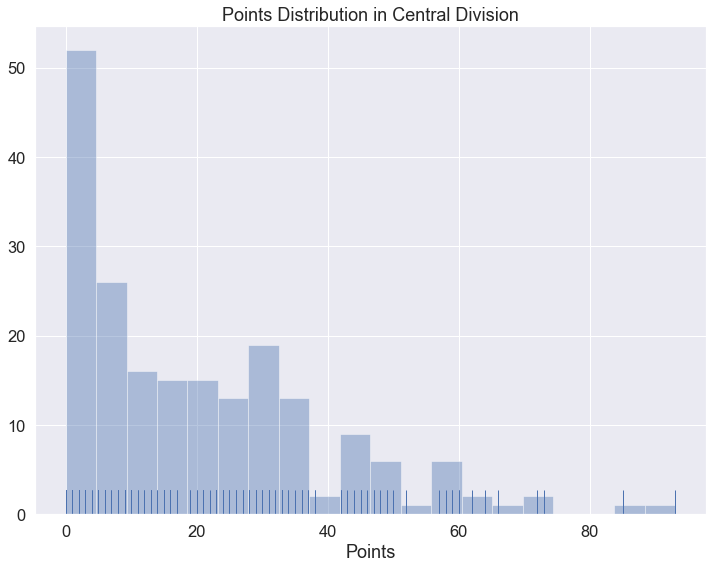

In [313]:
plt.figure(figsize = (10,8))
h = sns.distplot(central2.points, bins = 20, rug = True, kde = False)
h.set_xlabel('Points')
h.set_title('Points Distribution in Central Division')
plt.tight_layout()

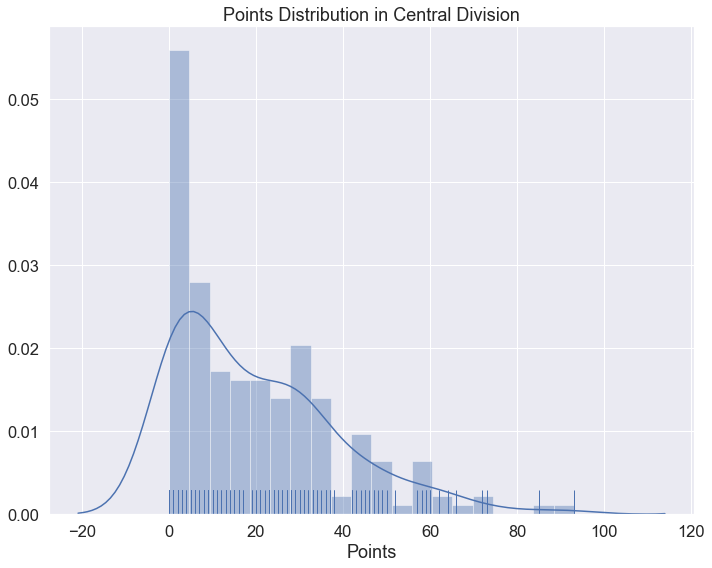

In [314]:
plt.figure(figsize = (10,8))
h = sns.distplot(central2.points, bins = 20, rug = True, kde = True)
h.set_xlabel('Points')
h.set_title('Points Distribution in Central Division')
plt.tight_layout()

# Jointplot

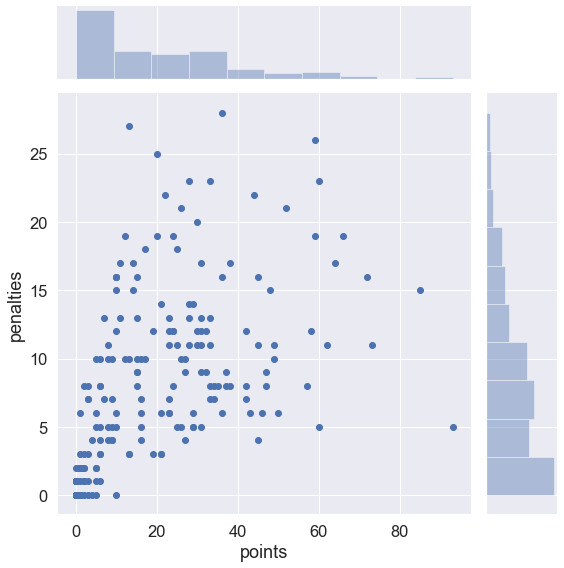

In [323]:
j = sns.jointplot(x = 'points', y = 'penalties', data = central2, height = 8)

# Hexplot

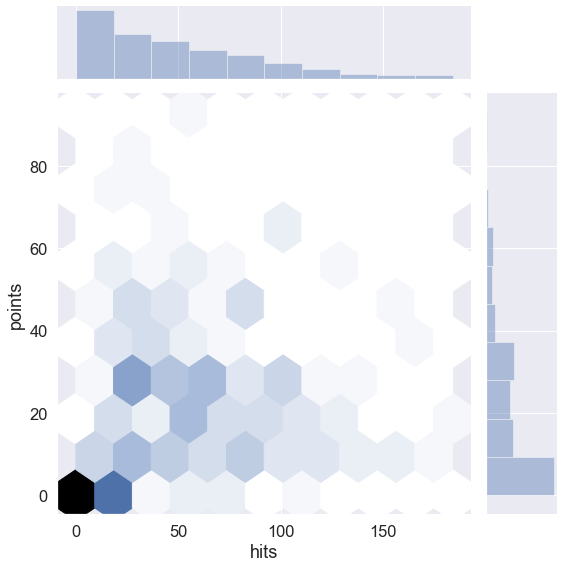

In [350]:
h = sns.jointplot(data = central2, x = 'hits', y = 'points', kind = 'hex', height = 8)

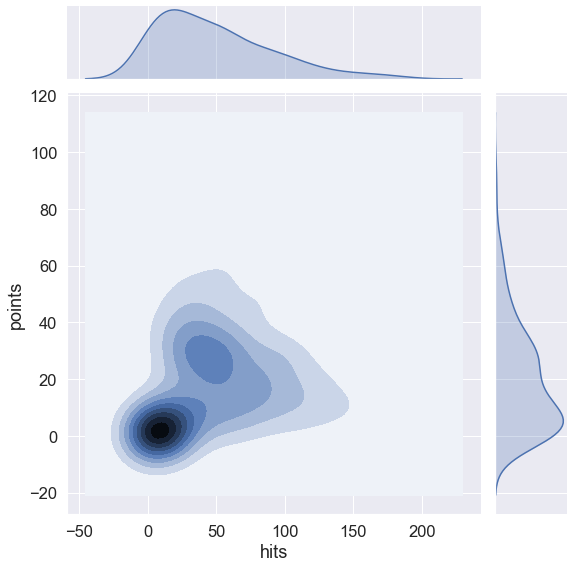

In [349]:
y = sns.jointplot(x = 'hits', y = 'points', kind = 'kde', data = central2, height = 8)